C:\Users\Lucas Andrin\AppData\Local\Temp\ipykernel_7520\1961742949.py:45: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Lucas Andrin\Documents\IFC\CD\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


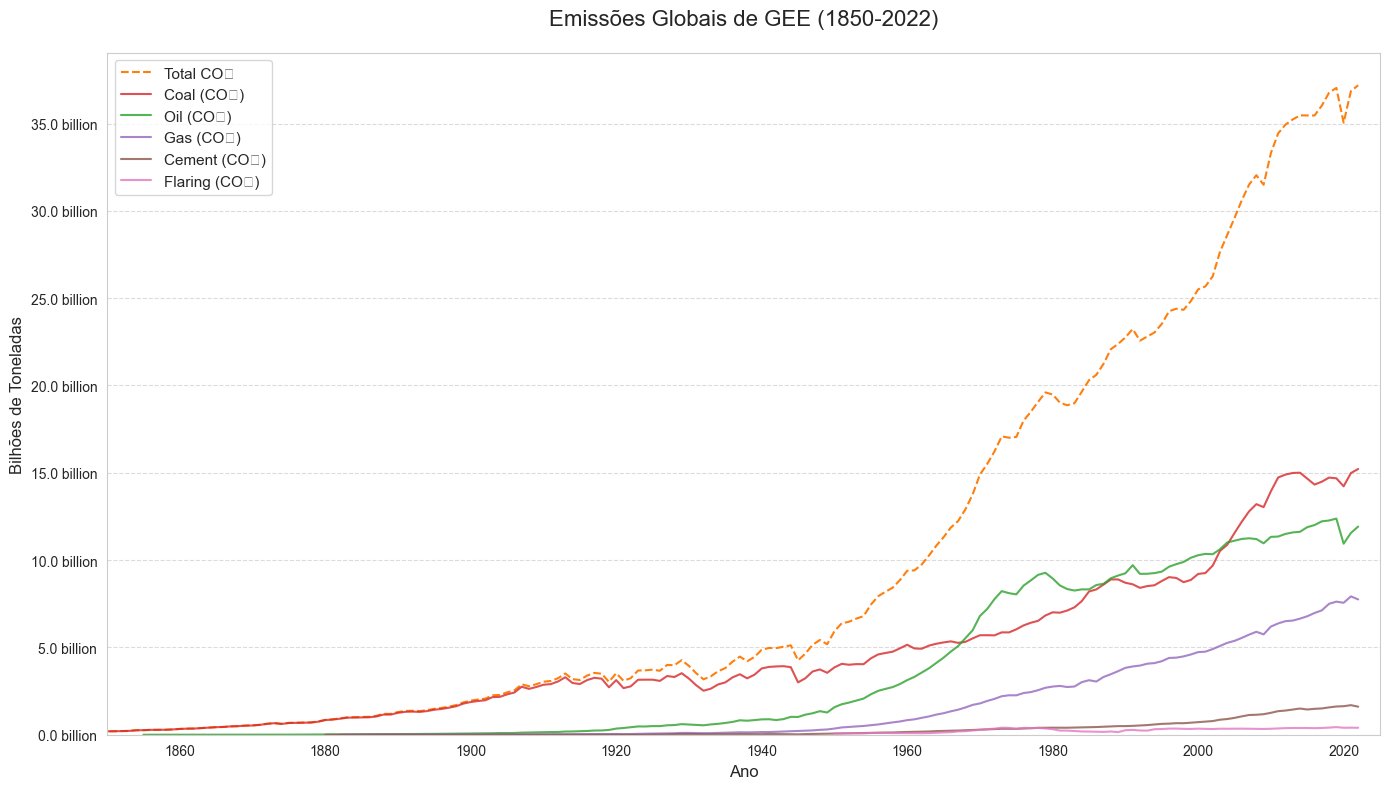

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/generated/gen-co2-emissions.csv')

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

def format_billions(value, pos):
    return f'{value/1e9:.1f} billion'

# Filtrar apenas dados globais (World)
dfwe = df[df['Entity'] == 'World'].copy()
dfwe = dfwe.sort_values('Year')

# Configurar estilo SEM grid vertical
sns.set_style("whitegrid", {'axes.grid': True, 'axes.grid.axis': 'y'})  # Grid apenas no eixo Y
plt.figure(figsize=(14, 8))

# Plotar GHG e Total CO₂
# plt.plot(dfwe['Year'], dfwe['GHG'], label='Total GHG', color='#1f77b4', linewidth=2)
plt.plot(dfwe['Year'], dfwe['Total (CO₂)'], label='Total CO₂', color='#ff7f0e', linestyle='--', linewidth=1.5)

# Plotar fontes específicas de CO₂
co2_sources = ['Coal (CO₂)', 'Oil (CO₂)', 'Gas (CO₂)', 'Cement (CO₂)', 'Flaring (CO₂)']
cores = ['#d62728', '#2ca02c', '#9467bd', '#8c564b', '#e377c2']

for fonte, cor in zip(co2_sources, cores):
    plt.plot(dfwe['Year'], dfwe[fonte], label=fonte, color=cor, alpha=0.8)

# Configurações do gráfico
plt.title('Emissões Globais de CO₂ (1850-2022)', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Bilhões de Toneladas', fontsize=12)
plt.xlim(1850, 2025)
plt.ylim(bottom=0)
plt.legend(title_fontsize=12, fontsize=11)

# Configurar grid APENAS horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Somente linhas horizontais
plt.grid(axis='x', visible=False)
plt.gca().yaxis.set_major_formatter(format_billions)  # Formatação corrigida

plt.tight_layout()
plt.show()